<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Laboratorio 1</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2025-2</h2>
</center>

## Librerias (No utilice ni importe librerias extras)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Contexto

En aritmética de punto flotante, la representación de los números es de **precisión finita**. Por ello, las operaciones producen **errores de redondeo** que pueden acumularse a lo largo de una secuencia de cálculos. En este laboratorio trabajaremos con la función

$$
g(x)=\frac{\sqrt{x^2+1}-1}{2\sin^2\!\left(\frac{x}{2}\right)},
$$

El enfoque utilizado será:

$$
h(x) =
\begin{cases}
1, & x = 0, \\
\frac{\sqrt{x^2+1}-1}{2\sin^2\!\left(\frac{x}{2}\right)}, & x \neq 0.
\end{cases}
$$

y estudiaremos el comportamiento numérico de distintas formulaciones al evaluar \(h(x)\) para valores de \(x\) que cubren varios órdenes de magnitud. El objetivo es **observar** y **describir** lo que ocurre, y a partir de las evidencias proponer formulaciones que resulten más adecuadas computacionalmente.





### Pregunta 1 (10 pts) Implemente en `h_algoritmo1(x)` la función $h(x)$
*Hint:* **Compute the numerator and the denominator separately, then combine them.**



In [2]:
def h_algoritmo1(x):
    """
    Input:
    x:      (ndarray or float) Valores donde evaluar la función.

    Output:
    h_vals: (ndarray or float) Evaluación de h(x) 
    """
    #------ acá va su código ------
    numerator = np.where(x == 0, 1.0, np.sqrt(1 + x**2) - 1)
    denominator = np.where(x == 0, 1.0, np.sin(x / 2)**2)

    #------ acá va su código ------
    h_vals = numerator / denominator
    
    return h_vals
import numpy as np

x_array = np.array([0.0, 1.0, 2.0])
print(h_algoritmo1(x_array))  # entrega np.array con 3 resultados

print(h_algoritmo1(0.0))      # entrega 1.0 (float)
print(h_algoritmo1(1.0))      # entrega un float


[1.         1.80211286 1.7456777 ]
1.0
1.8021128566038949


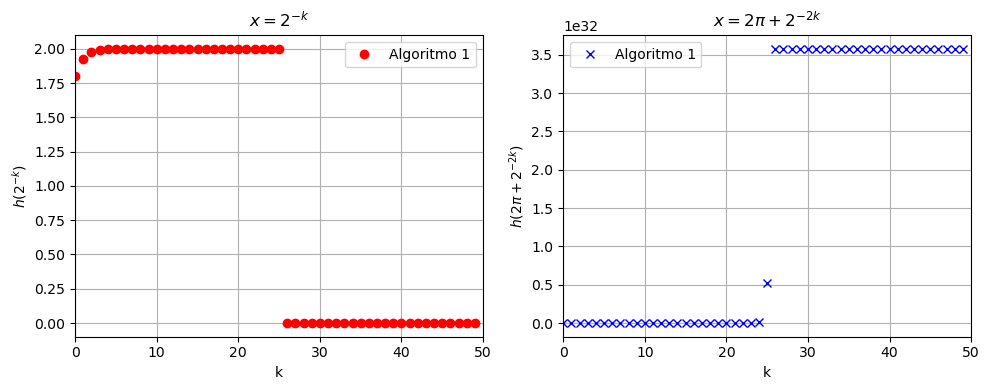

In [3]:
#######################################
# No modifique, solo ejecute
#######################################
h_algoritmo1 = np.vectorize(h_algoritmo1)
k_vals = np.arange(0, 50, dtype=int)
x_small = np.power(2.,-k_vals)
y_small = h_algoritmo1(x_small)

two_pi = 2.0 * np.pi
x_blow = two_pi + np.power(2.,-2.0 * k_vals)

y_blow = h_algoritmo1(x_blow)

mask_finite = np.isfinite(y_blow)
x_blow_plot = x_blow[mask_finite]
y_blow_plot = y_blow[mask_finite]
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes[0]
ax.plot(k_vals, y_small, "ro", label='Algoritmo 1')
ax.set_xlabel("k")
ax.set_ylabel(r"$h(2^{-k})$")
ax.set_title(r"$x=2^{-k}$ ")
ax.grid(True)
ax.legend()
ax.set_xlim(0, 50)
ax = axes[1]
ax.plot(k_vals[mask_finite], y_blow_plot, "bx", label=r'Algoritmo 1')
ax.set_xlabel("k")
ax.set_ylabel(r"$h(2\pi + 2^{-2k})$")
ax.set_title(r"$x=2\pi + 2^{-2k}$ ")
ax.grid(True)
ax.legend(loc='best')
ax.set_xlim(0, 50)
plt.tight_layout()
plt.show()


#### Pregunta 2 (15 ptos): Observe el comportamiento de $h(x)$ en el gráfico izquierdo conforme k aumenta. ¿Por qué los valores calculados por el Algoritmo 1 parecen desestabilizarse a partir de un valor k grande? Explique la causa numérica de este fenómeno.



En el gráfico izquierdo se observa que para valores pequeños de \( k \), el cálculo de $$ h(2^{-k}) $$ con el **Algoritmo 1** se mantiene estable alrededor de 2. Sin embargo, a partir de $$ k \approx 27 $$, los valores comienzan a desestabilizarse y decaen abruptamente hacia cero.

Esta desestabilización se debe a **errores de cancelación numérica** que ocurren en la expresión:

$$
h(x) = \frac{\sqrt{x^2 + 1}-1}{2\sin^2(x/2)}
$$

Cuando $$ x = 2^{-k} $$ y  k  es grande, entonces $$ x \to 0 $$. En ese caso:

- Tanto el numerador como el denominador tienden a valores muy pequeños.
- El cociente entre ellos se vuelve muy sensible a errores de redondeo.
- Esto genera **pérdida de importancia**, lo que produce una cancelación catastrófica 

---

**Conclusión:**  
Los valores de \( h(x) \) calculados por el Algoritmo 1 se desestabilizan para \( k \) grandes debido a **errores numéricos** que ocurren al dividir números muy pequeños y cercanos entre sí. Esto provoca una pérdida de significancia numérica y resultados inestables.



#### Pregunta 3 (10 Ptos) Explique a que se debe el comportamiento del gráfico de la derecha, note que no se están evaluando los mismos valores de $x$ que en el gráfico de la izquierda, sino los mismos de $k$ para $h(x)$.
*Hint: You can manipulate the limits of the graphics as you want*



El comportamiento del gráfico de la derecha se debe a que los valores de entrada no son simplemente $x = 2^{-k}$, sino $ x = 2\pi + 2^{-2k}$, lo cual hace que  x  esté muy cerca de  $2\pi$ pero ligeramente mayor.

La función:

$$
h(x) = \frac{\sqrt{x^2 + 1}-1}{2 \sin(x/2)}
$$

tiene un denominador muy pequeño cuando  x  está cerca de múltiplos de   $2\pi $, debido a que $ \sin(x/2) \to 0 $ cuando $ x \to 2\pi$. Esto produce una división por un valor muy cercano a cero, provocando que los valores de $ h(x)$ crezcan abruptamente y se vuelvan numéricamente inestables (tienden a infinito o valores enormes).

Además, los errores de redondeo se amplifican en esa zona debido al comportamiento oscilatorio de $ \sin(x/2) $ y su cercanía a ceros.

Esto quiere decir que el gráfico de la derecha explota debido a que el denominador se anula cuando $x \to 2\pi $, amplificando los errores numéricos y causando inestabilidad en el cálculo.


### Pregunta 4 (35 ptos) Describa y justifique un método para evitar el fenoméno producido en el algoritmo 1.
*hint: you can manipulate the function $h(x)$ as you wish*  



La función original está dada por:
$$
h(x) = \frac{\sqrt{x^2 + 1} - 1}{2 \sin^2(x/2)}
$$

Esta expresión presenta una indeterminación del tipo $ 0/0$ cuando $ x \to 0 $ .Además, el numerador sufre de cancelación numérica, ya que para valores pequeños de  x , se tiene que  $\sqrt{x^2 + 1} \approx 1$, por lo que la resta $ \sqrt{x^2 + 1} - 1 $ produce una pérdida significativa de cifras significativas.


Para evitar dicha cancelación catastrófica, se racionaliza el numerador multiplicando y dividiendo por el conjugado:

$$
\frac{\sqrt{x^2 + 1} - 1}{2 \sin^2(x/2)} \cdot \frac{\sqrt{x^2 + 1} + 1}{\sqrt{x^2 + 1} + 1} = \frac{x^2}{2 \sin^2(x/2)(\sqrt{x^2 + 1} + 1)}
$$

Esta nueva expresión es algebraicamente equivalente, pero más estable numéricamente al evitar la resta entre cantidades cercanas en el numerador.


 La reescritura racionalizada del numerador mejora significativamente la estabilidad numérica de la función para valores pequeños de  x , reduciendo los errores de redondeo y evitando la cancelación numérica.




#### Pregunta 5 (30 pts)  Implemente el **Algoritmo 2** en `h_algoritmo2(x)` que corresponde a $h(x)$ de una forma que evite el fenómeno involucrado en el algoritmo 1.


In [6]:
def h_algoritmo2(x):
    """
    Input:
    x:      (ndarray or float) Puntos de evaluación (float64).

    Output:
    h_vals: (ndarray or float)

    """
    #------ acá va su código ------
    numerator = x**2
    denomintator= 2 * np.sin(x / 2) * (np.sqrt(x**2 + 1) + 1)
    #------ acá va su código ------
    h_vals = numerator / denomintator
    return h_vals

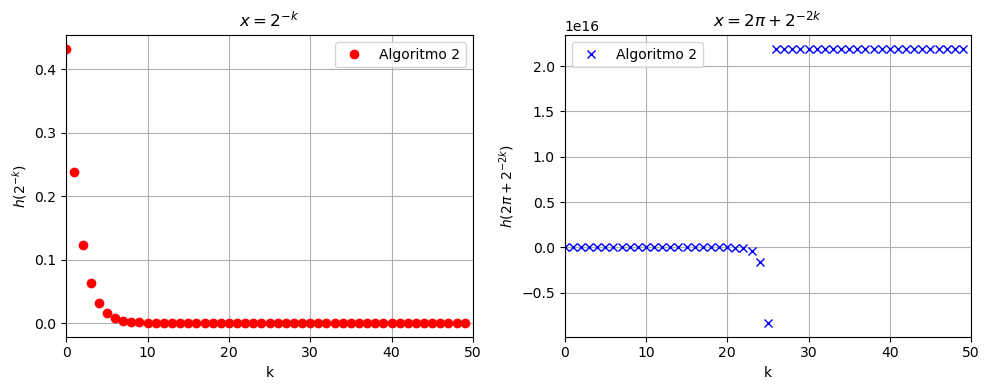

In [7]:

#######################################
# No modifique, solo ejecute para comparar con el Algoritmo 1
#######################################
h_algoritmo2 = np.vectorize(h_algoritmo2)
k_vals = np.arange(0, 50, dtype=int)
x_small = np.power(2.,-k_vals)
y_small = h_algoritmo2(x_small)

two_pi = 2.0 * np.pi
x_blow = two_pi + np.power(2,-2.0 * k_vals)

y_blow = h_algoritmo2(x_blow)

mask_finite = np.isfinite(y_blow)
x_blow_plot = x_blow[mask_finite]
y_blow_plot = y_blow[mask_finite]
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes[0]
ax.plot(k_vals, y_small, "ro", label='Algoritmo 2')
ax.set_xlabel("k")
ax.set_ylabel(r"$h(2^{-k})$")
ax.set_title(r"$x=2^{-k}$ ")
ax.grid(True)
ax.set_xlim(0, 50)
ax.legend()
ax = axes[1]
ax.plot(k_vals[mask_finite], y_blow_plot, "bx", label=r'Algoritmo 2')
ax.set_xlabel("k")
ax.set_ylabel(r"$h(2\pi + 2^{-2k})$")
ax.set_title(r"$x=2\pi + 2^{-2k}$")
ax.grid(True)
ax.legend(loc='best')
ax.set_xlim(0, 50)
plt.tight_layout()
plt.show()

#### Felicidades, llegaste al final del laboratorio recuerda subir el archivo al Aula y con el nombre apellido1_apellido2_lab_1